# Retention Study - Figuring Out Which Employees May Quit
### Loading our Main HR Database Records

In [1]:
import pandas as pd
#hr_df = pd.read_csv('./data/employee_retention/hr_data.csv') 

file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/hr_data.csv"
hr_df = pd.read_csv(file_name)

# We use the dataframe name followed by a '.head()' to use the head function to 
# preview the first 5 records of the dataframe. If you wanted to preview the first 10, simply 
# put dataframe_name.head(10)
hr_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [2]:
# View the bottom 5 rows
hr_df.tail()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
14994,87670,2,151,3,0,1,0,support,low
14995,87673,2,160,3,0,1,0,support,low
14996,87679,2,143,3,0,1,0,support,low
14997,87681,6,280,4,0,1,0,support,low
14998,87684,2,158,3,0,1,0,support,low


In [3]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee_id            14999 non-null  int64 
 1   number_project         14999 non-null  int64 
 2   average_montly_hours   14999 non-null  int64 
 3   time_spend_company     14999 non-null  int64 
 4   Work_accident          14999 non-null  int64 
 5   left                   14999 non-null  int64 
 6   promotion_last_5years  14999 non-null  int64 
 7   department             14999 non-null  object
 8   salary                 14999 non-null  object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


In [7]:
# View which columns are categorical
hr_df.select_dtypes( exclude=['int', 'float']).columns

Index(['employee_id', 'number_project', 'average_montly_hours',
       'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years',
       'department', 'salary'],
      dtype='object')

In [8]:
# Display values in categorical columns
print(hr_df['department'].unique())
print(hr_df['salary'].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


In [9]:
hr_df.dtypes

employee_id               int64
number_project            int64
average_montly_hours      int64
time_spend_company        int64
Work_accident             int64
left                      int64
promotion_last_5years     int64
department               object
salary                   object
dtype: object

In [10]:
# How many rows are in our dataset?
len(hr_df)

14999

In [11]:
# What about how many columns?
len(hr_df.columns)

9

In [12]:
hr_df.shape

(14999, 9)

### Loading our Evaluation and Employee Satisfaction Data

In [13]:
# Uncomment this line if using this notebook locally
#emp_satis_eval = pd.read_excel ('./data/employee_retention/employee_satisfaction_evaluation.xlsx') 

file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/employee_satisfaction_evaluation.xlsx"
emp_satis_eval = pd.read_excel(file_name)

emp_satis_eval.head()

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


In [14]:
emp_satis_eval.shape

(14999, 3)

### Merge or Join Tables

In [15]:
main_df = hr_df.set_index('employee_id').join(emp_satis_eval.set_index('EMPLOYEE #'))
main_df = main_df.reset_index()
main_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


### Is our dataset good? Are there missing values?

In [16]:
#main_df.isnull()
main_df[main_df.isnull().any(axis=1)]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,1,sales,low,NaN,NaN
19,1140,5,262,5,0,1,0,sales,low,NaN,0.89
33,1230,2,140,3,0,1,0,hr,low,NaN,NaN
53,1340,2,132,3,0,1,0,support,low,NaN,NaN
72,22316,2,149,3,0,1,0,product_mng,high,NaN,NaN
92,1581,2,143,3,0,1,0,sales,low,NaN,NaN
107,17376,2,148,3,0,1,0,accounting,medium,NaN,NaN
120,1739,4,158,4,1,1,0,technical,low,NaN,NaN
137,1847,2,129,3,0,1,0,management,low,NaN,NaN
175,32923,4,164,2,0,1,0,sales,low,NaN,NaN


In [22]:
main_df[main_df.isnull().any(axis=1)].shape

(43, 11)

In [26]:
main_df.isnull().any()

employee_id              False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
department               False
salary                   False
satisfaction_level        True
last_evaluation           True
dtype: bool

### Let's fill in the missing blanks with the aveage values

In [27]:
main_df.describe()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14972.000000,14972.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.612830,0.716125
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.248714,0.171138
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.090000,0.360000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.440000,0.560000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.640000,0.720000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.820000,0.870000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
main_df.fillna(main_df.mean(), inplace=True)
main_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [29]:
#main_df[main_df.employee_id == 3794]
main_df.loc[main_df['employee_id'] == 3794]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,1,sales,low,0.61283,0.716125


In [30]:
main_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [31]:
# Removing employee ID
main_df_final = main_df.drop(columns='employee_id')
main_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,sales,low,0.38,0.53
1,5,262,6,0,1,0,sales,medium,0.80,0.86
2,7,272,4,0,1,0,sales,medium,0.11,0.88
3,5,223,5,0,1,0,sales,low,0.72,0.87
4,2,159,3,0,1,0,sales,low,0.37,0.52


In [32]:
main_df_final.groupby('department').sum()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,4683,248119,4256,164,273,3,758.17283,879.452250
RandD,3033,158030,2650,134,121,27,487.80000,560.446125
accounting,2934,154292,2702,96,204,14,446.68283,550.706125
hr,2701,146828,2480,89,215,15,442.53566,524.006125
management,2432,126787,2711,103,91,69,391.76566,456.234499
marketing,3164,171073,3063,138,203,43,530.62283,613.946125
product_mng,3434,180369,3135,132,198,0,559.19566,644.662250
sales,15634,831773,14631,587,1014,100,2543.77981,2938.236749
support,8479,447490,7563,345,555,20,1377.90849,1611.534499


In [33]:
main_df_final.groupby('department').mean()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445,0.617908,0.716750
RandD,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307,0.619822,0.712130
accounting,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253,0.582377,0.718000
hr,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298,0.598830,0.709075
management,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524,0.621850,0.724182
marketing,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117,0.618442,0.715555
product_mng,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000,0.619951,0.714703
sales,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155,0.614440,0.709719
support,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973,0.618173,0.722985


In [34]:
main_df_final['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [35]:
main_df_final['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

### Displaying Your Correlation Matrix

No handles with labels found to put in legend.


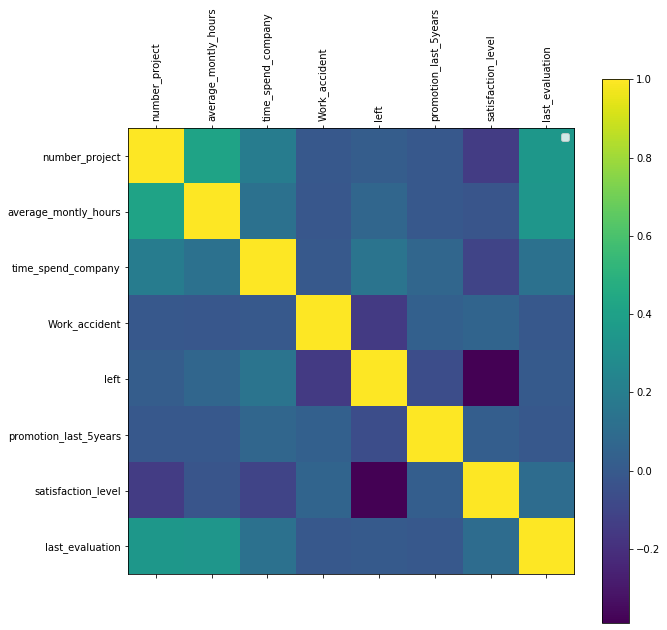

In [22]:
import matplotlib.pyplot as plt

def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.legend()
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)
    
plot_corr(main_df_final)

<IPython.core.display.Javascript object>

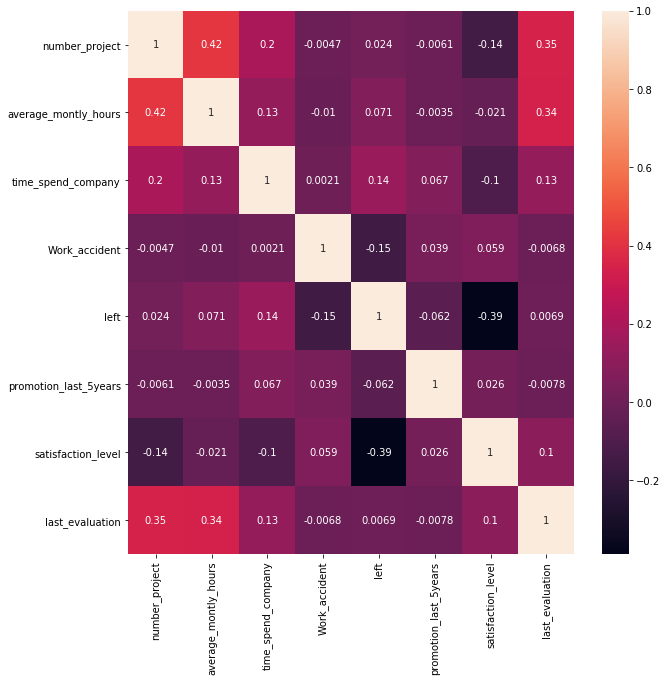

In [47]:
import seaborn as sns
plt.subplots(figsize=(10,10)) 
sns.heatmap(main_df_final.corr(),annot=True)

## Preparing out  Dataset for ML

In [48]:
# Perform One Hot Encoding on Categorical Data

categorial = ['department','salary']
main_df_final = pd.get_dummies(main_df_final, columns=categorial, drop_first=True)
main_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,2,157,3,0,1,0,0.38,0.53,0,0,0,0,0,0,1,0,0,1,0
1,5,262,6,0,1,0,0.80,0.86,0,0,0,0,0,0,1,0,0,0,1
2,7,272,4,0,1,0,0.11,0.88,0,0,0,0,0,0,1,0,0,0,1
3,5,223,5,0,1,0,0.72,0.87,0,0,0,0,0,0,1,0,0,1,0
4,2,159,3,0,1,0,0.37,0.52,0,0,0,0,0,0,1,0,0,1,0


In [49]:
# How many columns do we now have?

len(main_df_final.columns)

19

In [50]:
# How many employees in the dataset have left?

len(main_df_final.loc[main_df_final['left'] == 1])

3571

In [51]:
main_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,2,157,3,0,1,0,0.38,0.53,0,0,0,0,0,0,1,0,0,1,0
1,5,262,6,0,1,0,0.80,0.86,0,0,0,0,0,0,1,0,0,0,1
2,7,272,4,0,1,0,0.11,0.88,0,0,0,0,0,0,1,0,0,0,1
3,5,223,5,0,1,0,0.72,0.87,0,0,0,0,0,0,1,0,0,1,0
4,2,159,3,0,1,0,0.37,0.52,0,0,0,0,0,0,1,0,0,1,0


In [52]:
main_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   number_project          14999 non-null  int64  
 1   average_montly_hours    14999 non-null  int64  
 2   time_spend_company      14999 non-null  int64  
 3   Work_accident           14999 non-null  int64  
 4   left                    14999 non-null  int64  
 5   promotion_last_5years   14999 non-null  int64  
 6   satisfaction_level      14999 non-null  float64
 7   last_evaluation         14999 non-null  float64
 8   department_RandD        14999 non-null  uint8  
 9   department_accounting   14999 non-null  uint8  
 10  department_hr           14999 non-null  uint8  
 11  department_management   14999 non-null  uint8  
 12  department_marketing    14999 non-null  uint8  
 13  department_product_mng  14999 non-null  uint8  
 14  department_sales        14999 non-null

## Preparing our Dataset for Machine Learning

In [53]:
from sklearn.model_selection import train_test_split

# We remove the label values from our training data
X = main_df_final.drop(['left'],axis=1).values

# We assigned those label values to our Y dataset
y = main_df_final['left'].values


In [54]:
# Split it to a 70:30 Ratio Train:Test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [55]:
# Normalize the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# fit(raw_documents[, y]): Learn a vocabulary dictionary of all tokens in the raw documents.
# fit_transform(raw_documents[, y]): Learn the vocabulary dictionary and return term-document matrix. This is equivalent to fit followed by the transform, but more efficiently implemented.

In [56]:
df_train = pd.DataFrame(X_train)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.171506,-0.703726,-0.337150,-0.414759,-0.145957,0.513414,-1.083937,-0.237816,-0.233538,4.349966,-0.213816,-0.246848,-0.252872,-0.609967,-0.416177,-0.473831,1.028504,-0.867783
1,-0.645110,-0.221195,2.390974,-0.414759,-0.145957,-0.298453,-0.439765,-0.237816,-0.233538,-0.229887,-0.213816,-0.246848,-0.252872,1.639433,-0.416177,-0.473831,-0.972286,1.152362
2,-1.461726,-1.105836,-0.337150,-0.414759,-0.145957,-0.826167,-1.318181,-0.237816,-0.233538,-0.229887,-0.213816,-0.246848,-0.252872,-0.609967,-0.416177,-0.473831,1.028504,-0.867783
3,0.988121,0.442286,-0.337150,-0.414759,-0.145957,1.122314,1.317069,-0.237816,-0.233538,-0.229887,-0.213816,-0.246848,-0.252872,1.639433,-0.416177,-0.473831,-0.972286,1.152362
4,1.804737,1.407349,0.344881,-0.414759,-0.145957,-2.125154,1.551313,-0.237816,-0.233538,-0.229887,-0.213816,-0.246848,-0.252872,1.639433,-0.416177,-0.473831,1.028504,-0.867783


In [57]:
df_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04
mean,-1.764656e-16,2.481426e-16,7.294331e-16,2.406167e-15,2.538264e-16,2.417704e-14,1.480401e-14,6.294507e-16,1.173353e-16,5.259416e-16,-1.803491e-17,-1.970130e-15,4.066976e-16,1.153684e-16,1.509370e-15,5.297326e-16,-6.332469e-16,-7.730003e-17
std,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00
min,-1.461726e+00,-2.111110e+00,-1.019182e+00,-4.147590e-01,-1.459572e-01,-2.125154e+00,-2.079476e+00,-2.378157e-01,-2.335380e-01,-2.298869e-01,-2.138156e-01,-2.468475e-01,-2.528716e-01,-6.099669e-01,-4.161775e-01,-4.738312e-01,-9.722860e-01,-8.677830e-01
25%,-6.451101e-01,-9.047809e-01,-3.371504e-01,-4.147590e-01,-1.459572e-01,-7.043870e-01,-9.082536e-01,-2.378157e-01,-2.335380e-01,-2.298869e-01,-2.138156e-01,-2.468475e-01,-2.528716e-01,-6.099669e-01,-4.161775e-01,-4.738312e-01,-9.722860e-01,-8.677830e-01
50%,1.715056e-01,-2.013995e-02,-3.371504e-01,-4.147590e-01,-1.459572e-01,1.074801e-01,2.872418e-02,-2.378157e-01,-2.335380e-01,-2.298869e-01,-2.138156e-01,-2.468475e-01,-2.528716e-01,-6.099669e-01,-4.161775e-01,-4.738312e-01,-9.722860e-01,-8.677830e-01
75%,9.881213e-01,8.846065e-01,3.448808e-01,-4.147590e-01,-1.459572e-01,7.975671e-01,9.071409e-01,-2.378157e-01,-2.335380e-01,-2.298869e-01,-2.138156e-01,-2.468475e-01,-2.528716e-01,1.639433e+00,-4.161775e-01,-4.738312e-01,1.028504e+00,1.152362e+00
max,2.621353e+00,2.191463e+00,4.437068e+00,2.411039e+00,6.851324e+00,1.568841e+00,1.668435e+00,4.204937e+00,4.281959e+00,4.349966e+00,4.676926e+00,4.051083e+00,3.954576e+00,1.639433e+00,2.402821e+00,2.110456e+00,1.028504e+00,1.152362e+00


## Let's Train a Logistic Regression Model

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 80.11%
[[3183  243]
 [ 652  422]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      3426
           1       0.63      0.39      0.49      1074

    accuracy                           0.80      4500
   macro avg       0.73      0.66      0.68      4500
weighted avg       0.78      0.80      0.78      4500



# New Addition (22-Jan-2020)
# Test your model on a single new row of data

In [59]:
# Create Test Input 
# Enter your values here

input_data = {'number_project': [3],
              'average_montly_hours': [160],
              'time_spend_company': [5],
              'Work_accident': [0],
              'promotion_last_5years': [1],
              'last_evaluation': [0.5],
              'satisfaction_level': [0.5],
              'department_RandD': [0],
              'department_accounting': [0],
              'department_hr': [0],
              'department_management': [0],
              'department_marketing': [1],
              'department_product_mng': [0],
              'department_sales': [0],
              'department_support': [0],
              'department_technical': [0],
              'salary_low': [0],
              'salary_medium': [1]}

# Convert to pandas dataframe
input_data = pd.DataFrame(input_data)

# Transform data using sc.transform
input_data = sc.transform(input_data)

# Reshape data for input into our model predict function
input_data = input_data.reshape(1, -1)

# Run prediction for our test sameple, 0 means employee will not leave, 1 means they are likely to leave/resign
model.predict(input_data)

# print probabilities of belonging to either class
model.predict_proba(input_data)

array([[0.89339197, 0.10660803]])

### Let's Try a Random Forest Classifer

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
score = model.score(X_test, y_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 99.02%
[[3420    6]
 [  38 1036]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3426
           1       0.99      0.96      0.98      1074

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.99      4500
weighted avg       0.99      0.99      0.99      4500



In [61]:
hr_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [62]:
main_df_final.drop(['left'],axis=1).columns

Index(['number_project', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'promotion_last_5years', 'satisfaction_level',
       'last_evaluation', 'department_RandD', 'department_accounting',
       'department_hr', 'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical', 'salary_low', 'salary_medium'],
      dtype='object')

In [69]:
df_index=pd.DataFrame(main_df_final.drop(['left'],axis=1).columns)
df_index.columns=['Column_name']
df_index['index']=df_index.index
df_index

,Column_name,index
0,number_project,0
1,average_montly_hours,1
2,time_spend_company,2
3,Work_accident,3
4,promotion_last_5years,4
5,satisfaction_level,5
6,last_evaluation,6
7,department_RandD,7
8,department_accounting,8
9,department_hr,9


In [76]:
import pandas as pd
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = pd.DataFrame(X_train).columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances['index']=feature_importances.index
feature_importances = feature_importances.set_index('index').join(df_index.set_index('index'))
feature_importances

,importance,Column_name
index,,
5,0.306406,satisfaction_level
2,0.191275,time_spend_company
0,0.188482,number_project
1,0.141881,average_montly_hours
6,0.127096,last_evaluation
3,0.010278,Work_accident
16,0.007599,salary_low
17,0.004373,salary_medium
13,0.003571,department_sales


### Can Deep Learning Make a Difference?

In [78]:
# Use the newest version of TensorFlow 2.0
#%tensorflow_version 2.x 

In [79]:
# If you wish to use Tensorflow 1.X run the following line and then restart runtime
# %tensorflow_version 1.x 
# You'll need to change your import statements from tensorflow.keras to keras
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(9, kernel_initializer = "uniform", activation = "relu", input_dim=18))
model.add(Dense(1, kernel_initializer = "uniform", activation = "sigmoid"))

model.compile(optimizer= "adam",loss = "binary_crossentropy",metrics = ["accuracy"])

In [80]:
# Display Model Summary and Show Parameters
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 9)                 171       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 10        
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [81]:
# Start Training Our Classifier 
batch_size = 10
epochs = 25

history = model.fit(X_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/25
1050/1050 [==============================] - 6s 6ms/step - loss: 0.4151 - accuracy: 0.8238 - val_loss: 0.2594 - val_accuracy: 0.9167
Epoch 2/25
1050/1050 [==============================] - 6s 6ms/step - loss: 0.2240 - accuracy: 0.9305 - val_loss: 0.1876 - val_accuracy: 0.9429
Epoch 3/25
1050/1050 [==============================] - 5s 5ms/step - loss: 0.1842 - accuracy: 0.9456 - val_loss: 0.1672 - val_accuracy: 0.9500
Epoch 4/25
1050/1050 [==============================] - 5s 5ms/step - loss: 0.1734 - accuracy: 0.9497 - val_loss: 0.1600 - val_accuracy: 0.9516
Epoch 5/25
1050/1050 [==============================] - 6s 6ms/step - loss: 0.1697 - accuracy: 0.9504 - val_loss: 0.1577 - val_accuracy: 0.9504
Epoch 6/25
1050/1050 [==============================] - 6s 6ms/step - loss: 0.1673 - accuracy: 0.9493 - val_loss: 0.1570 - val_accuracy: 0.9507
Epoch 7/25
1050/1050 [==============================] - 6s 5ms/step - loss: 0.1657 - accuracy: 0.9506 - val_loss: 0.1547 - val_accuracy:

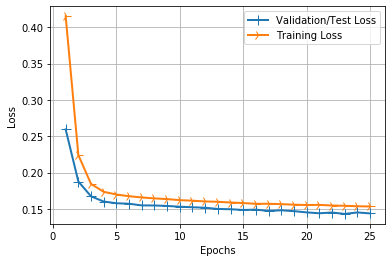

In [82]:
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

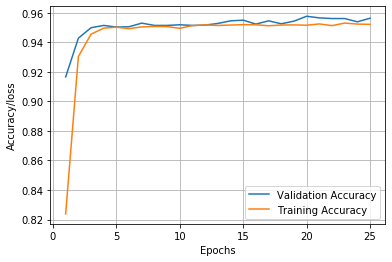

In [86]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line3 = plt.plot(epochs, val_acc_values, label='Validation Accuracy')
line3 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy/loss')
plt.grid(True)
plt.legend()
plt.show()

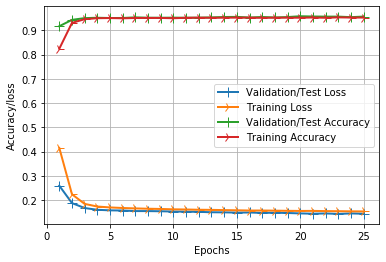

In [87]:
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)
line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
line3 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line4 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.setp(line3, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line4, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy/loss')
plt.grid(True)
plt.legend()
plt.show()

## Displaying the Classification Report and Confusion Matrix

In [88]:
predictions = model.predict(X_test)
predictions = (predictions > 0.5)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[3337   89]
 [ 107  967]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3426
           1       0.92      0.90      0.91      1074

    accuracy                           0.96      4500
   macro avg       0.94      0.94      0.94      4500
weighted avg       0.96      0.96      0.96      4500



# Let's a Deeper Model

In [89]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

model2 = Sequential()

# Hidden Layer 1
model2.add(Dense(270, activation='relu', input_dim=18, kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3, noise_shape=None, seed=None))

# Hidden Layer 1
model2.add(Dense(180, activation='relu', input_dim=18, kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3, noise_shape=None, seed=None))

# Hidden Layer 2
model2.add(Dense(90, activation = 'relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3, noise_shape=None, seed=None))

model2.add(Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 270)               5130      
_________________________________________________________________
dropout (Dropout)            (None, 270)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 180)               48780     
_________________________________________________________________
dropout_1 (Dropout)          (None, 180)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 90)                16290     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 91        
Total params: 70,291
Trainable params: 70,291
Non-trainable params: 0
__________________________________________________

In [92]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Training our Deeper Model

In [95]:
batch_size = 10
epochs = 25

history = model2.fit(X_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (X_test, y_test))

score = model2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/25
1050/1050 [==============================] - 6s 6ms/step - loss: 0.2141 - accuracy: 0.9499 - val_loss: 0.1873 - val_accuracy: 0.9644
Epoch 2/25
1050/1050 [==============================] - 6s 5ms/step - loss: 0.2169 - accuracy: 0.9494 - val_loss: 0.1847 - val_accuracy: 0.9622
Epoch 3/25
1050/1050 [==============================] - 6s 6ms/step - loss: 0.2165 - accuracy: 0.9508 - val_loss: 0.1868 - val_accuracy: 0.9589
Epoch 4/25
1050/1050 [==============================] - 7s 7ms/step - loss: 0.2141 - accuracy: 0.9497 - val_loss: 0.1881 - val_accuracy: 0.9564
Epoch 5/25
1050/1050 [==============================] - 6s 6ms/step - loss: 0.2127 - accuracy: 0.9502 - val_loss: 0.1828 - val_accuracy: 0.9633
Epoch 6/25
1050/1050 [==============================] - 7s 7ms/step - loss: 0.2112 - accuracy: 0.9502 - val_loss: 0.1851 - val_accuracy: 0.9629
Epoch 7/25
1050/1050 [==============================] - 5s 5ms/step - loss: 0.2165 - accuracy: 0.9491 - val_loss: 0.2058 - val_accuracy:

In [97]:
predictions = model2.predict(X_test)
predictions = (predictions > 0.5)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[3349   77]
 [  96  978]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3426
           1       0.93      0.91      0.92      1074

    accuracy                           0.96      4500
   macro avg       0.95      0.94      0.95      4500
weighted avg       0.96      0.96      0.96      4500



In [99]:
predictions=pd.DataFrame(predictions)

In [100]:
predictions

,0
0,False
1,True
2,False
3,False
4,False
...,...
4495,False
4496,False
4497,False
4498,False


In [101]:
predictions[0].value_counts()

False    3445
True     1055
Name: 0, dtype: int64